<a href="https://colab.research.google.com/github/poojan007/ICT619-Waste-Sorting-Assistant/blob/main/ICT619_Assignment_1_DA_and_TL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SmartSort Model
This model performs a process for data augmentation, and training a convolutional neural network (CNN) using Transfer Learning using VGG16 and MobileNetV2 on image data for classifying waste images into recyclable and organic.



## Upload file by mounting Google Drive

In [3]:
from google.colab import drive
drive.mount('/mntDrive')

Mounted at /mntDrive


In [4]:
# load data from google drive and unzip it

!unzip -q /mntDrive/MyDrive/ICT619-Dataset/archive.zip -d data

## Importing Libraries

In [59]:
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import load_model
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image

## Define dataset paths

In [60]:
train_dir = '/content/data/DATASET/TRAIN'
validation_dir = '/content/data/DATASET/TEST'

## Data Augmentation

A data augmentation pipeline is created using a 'Sequential' model, which includes random flips, rotations, zooms, and translations. This is to artifically expland the training dataset by generating modifiied versions of the training images, helping the model generalize better.

In [38]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(0.2),
  layers.experimental.preprocessing.RandomTranslation(height_factor=0.2, width_factor=0.2)
])


## Loading the datasets

The training and validation datasets are loaded from directories, specifying image size, batch size, and how the data is split. The 'validation_split' parameter

In [39]:
batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 22564 files belonging to 2 classes.
Using 18052 files for training.
Found 2513 files belonging to 2 classes.
Using 502 files for validation.


## Configuring Datasets for Performance

These lines configure the datasets for performance '.cache()' keeps the images in memory after they're loaded off disk during the first epoch, '.shuffle()' randomizes the order of the images to reduce model overfitting, and '.prefetch()' overlaps data preprocessing and model execution while training.

In [40]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Model Building

Building the CNN model architecture. It starts with the data augmentation layer, followed by a rescaling layer to normalize pixel values. Then, it adds convolutional and max pooling layers for feature extraction, followed by dense layers for classification. The final layer uses a sigmoid activation function suitable for binary classification.

In [41]:
model = models.Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

## Compile the Model

The model is compiled with the Adam optimizer and binary crossentropy loss function, which is appropriate for binary classification tasks. The model's performance will be evaluated based on accuracy.

In [42]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Model Training

Finally, the model is trained for a defined number of epochs using the training dataset, with validation performed on the validation dataset. The 'fit' method returns a history object containing training and validation loss and accuracy for each epoch, which can be used for analysis of the model's performance over time.

In [43]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
565/565 [==============================] - 35s 29ms/step - loss: 0.8161 - accuracy: 0.7813 - val_loss: 0.3810 - val_accuracy: 0.8446
Epoch 2/10
565/565 [==============================] - 16s 28ms/step - loss: 0.4436 - accuracy: 0.8070 - val_loss: 0.4715 - val_accuracy: 0.8008
Epoch 3/10
565/565 [==============================] - 16s 28ms/step - loss: 0.4303 - accuracy: 0.8127 - val_loss: 0.3632 - val_accuracy: 0.8486
Epoch 4/10
565/565 [==============================] - 16s 28ms/step - loss: 0.4228 - accuracy: 0.8145 - val_loss: 0.3192 - val_accuracy: 0.8865
Epoch 5/10
565/565 [==============================] - 16s 28ms/step - loss: 0.4273 - accuracy: 0.8106 - val_loss: 0.3388 - val_accuracy: 0.8705
Epoch 6/10
565/565 [==============================] - 16s 28ms/step - loss: 0.4173 - accuracy: 0.8166 - val_loss: 0.3818 - val_accuracy: 0.8526
Epoch 7/10
565/565 [==============================] - 16s 28ms/step - loss: 0.4183 - accuracy: 0.8165 - val_loss: 0.2903 - val_accuracy:

In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 253472)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               32444544  
                                                      

## Evaluating the performance

In [45]:
# Evaluate the model on the training dataset
train_loss, train_accuracy = model.evaluate(train_ds)
print(f"Training Loss: {train_loss}")
print(f"Training Accuracy: {train_accuracy}")

# Evaluate the model on the validation (or test) dataset
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

565/565 [==============================] - 5s 8ms/step - loss: 0.3996 - accuracy: 0.8254
Training Loss: 0.39957761764526367
Training Accuracy: 0.8253933191299438
16/16 [==============================] - 0s 10ms/step - loss: 0.3221 - accuracy: 0.8785
Validation Loss: 0.3220556378364563
Validation Accuracy: 0.8784860372543335


## Visualizing training results

The plots of loss and accuracy on the training and validation sets.

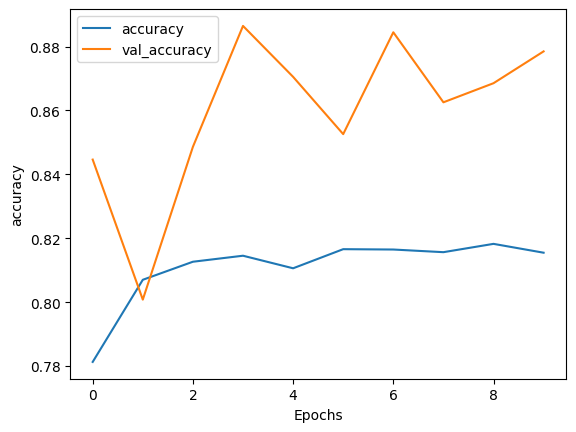

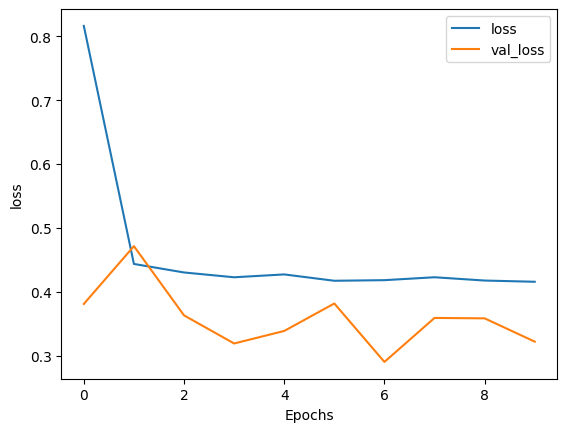

In [46]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Validating the model

In [56]:
# Function to prepare and predict the class of an image
def predict_with_augmentation(img_path, model):
    # Load the image
    img = image.load_img(img_path, target_size=(img_height, img_width))

    # Convert the image to a numpy array
    img_array = image.img_to_array(img)

    # Expand dimensions to match the shape of model input
    img_array = np.expand_dims(img_array, axis=0)

    # Predict (data augmentation is applied automatically)
    prediction = model.predict(img_array)

    if prediction[0][0] > 0.5:
      predicted_class = 'Recyclable Waste'
    else:
      predicted_class = 'Organic Waste'

    return predicted_class

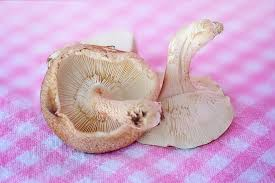

In [57]:
# Example usage
img_path = 'O_9965.jpg'
Image.open(img_path)

In [58]:
predicted_class = predict_with_augmentation(img_path, model)
print(f'Predicted: {predicted_class}')

1/1 [==============================] - 0s 17ms/step
Predicted: Recyclable Waste
